# introduction to neural network classification with TensorFlow
in this notebook we're going to learn how to write neural networks for classification problems.

A Classification is where you try to classify something as one thing or another
A Few types of classification problems:
* Binary classigication
* Multiclass classification
* multilabel classification


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state= 42)

In [ ]:

# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to undrestand let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

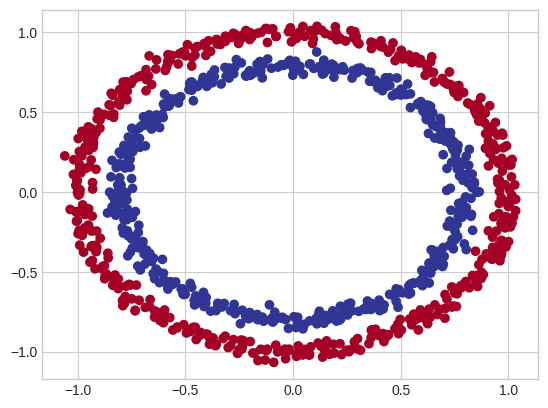

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shpaes

In [ ]:
# Check the shapes of out features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10] # It's a scaler

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of the features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)


## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])#Accuracy = (Number of correct predictions) / (Overall number of predictions)
# 3. Fit the model
model_1.fit(X, y, epochs = 50)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 5.7847 - accuracy: 0.4800
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 5.7779 - accuracy: 0.4810
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 5.7651 - accuracy: 0.4820
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 5.7624 - accuracy: 0.4820
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 5.7316 - accuracy: 0.4810
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 5.7284 - accuracy: 0.4830
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 5.7242 - accuracy: 0.4820
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 5.7145 - accuracy: 0.4820
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 5.6999 - accuracy: 0.4830
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 5.6538 - accuracy: 0.4850
Epoch 11/50
32/32 [

In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.7632 - accuracy: 0.4930


[0.7632295489311218, 0.49300000071525574]

Since we're working on a binart classification problem and our model is getting around ~50% accuract it's performing as it's gussing.

So Let's step things Up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choise a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_3.fit(X, y, epochs=20, verbose = 0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4550


[0.6931572556495667, 0.45500001311302185]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visulize our models predictions let's create a function `plot_decision_boundary'.
 This function will:
 * Take in a trained model, features (X) and labels (y)
 * Create a meshgrid of the different X values
 * Make predictions across the meshgrid
 * Plot the predictions as well as a line between the different zones (where each units class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


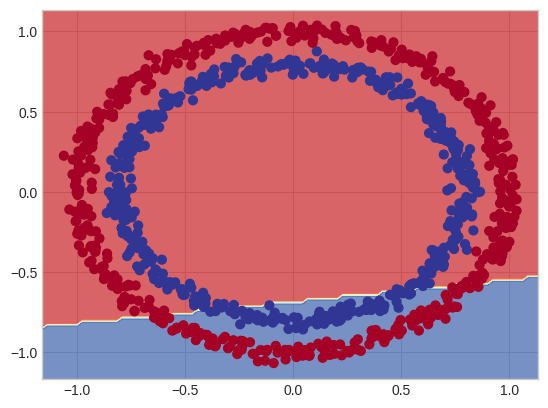

In [ ]:
# Check out the prediction our model's making
plot_decision_boundary(model = model_3, X = X, y= y)

In [ ]:
# Let's see if out model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100
X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=True
      • mask=None


Oh wait... We compiled our model for a binary classification problem.
But.. We're now working on a regression problem. Let's change our data to fit our regression problem

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 575.7695 - mae: 575.7695
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 465.2505 - mae: 465.2505
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 360.1259 - mae: 360.1259
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 251.6530 - mae: 251.6530
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 138.5753 - mae: 138.5753
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.4971 - mae: 51.4971
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 80.3150 - mae: 80.3150
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 72.7884 - mae: 72.7884
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 47.3781 - mae: 47.3781
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 50.7556 - mae: 50.7556
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 4ms/step


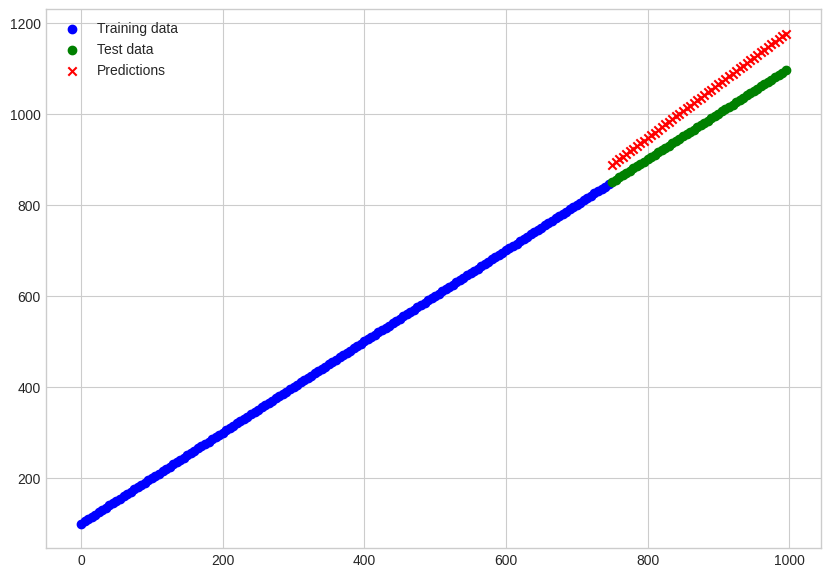

In [ ]:
# Make predictions with our trained modeel
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions againts our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c= "b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c= "g", label ="Test data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", marker="x" ,label="Predictions")
plt.legend();

## The missing piexe: Non-linearity

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

The missing piece: Non-linearity
Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

🔨 Practice: Before we get to the next steps, I'd encourage you to play around with the TensorFlow Playground (check out what the data has in common with our own classification data) for 10-minutes. In particular the tab which says "activation". Once you're done, come back.

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: TensorFlow Playground.

The neural network we're going to recreate with TensorFlow code. See it live at TensorFlow Playground.

The main change we'll add to models we've built before is the use of the activation keyword.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.1972 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6381 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1015 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0213 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0859 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9660 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5000
Epoch 11/

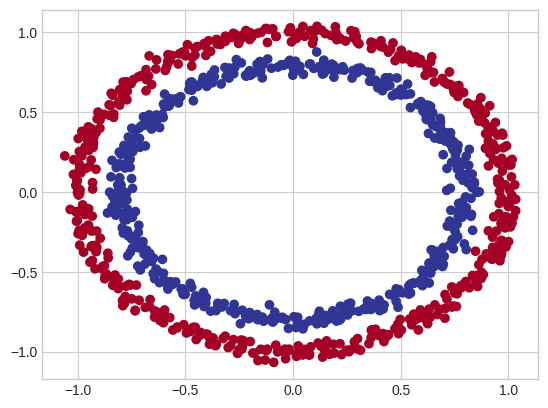

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


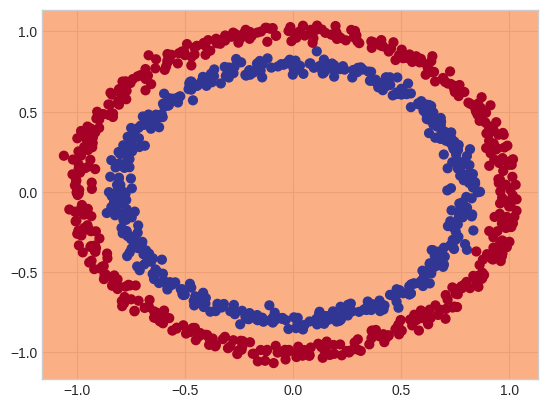

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Hmm... still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with ReLU, pronounced "rel-u", (short for rectified linear unit), activation on the first one, and 4 neurons each?

To see this network in action, check out the TensorFlow Playground demo.

The neural network we're going to recreate with TensorFlow code. See it live at TensorFlow Playground.

Let's try.

Note: in the course, Daniel used lr instead of learning_rate. But for the update, we had changed to learning_rate instead of lr.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.5226 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5813 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1435 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3217 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2501 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2053 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1699 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1392 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1126 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0881 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5580


[0.6774427890777588, 0.5580000281333923]

We're still hitting 50% accuracy, our model is still practically as good as guessing.

How do the predictions look?

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


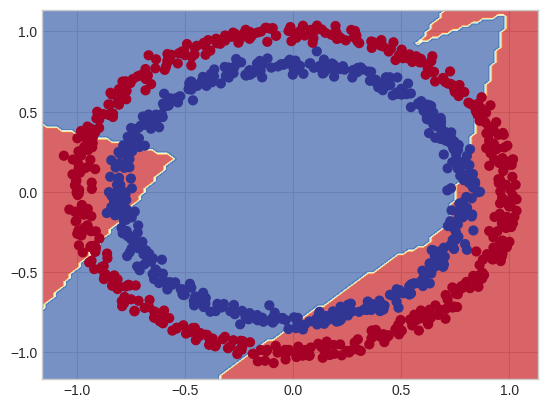

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

What gives?

It seems like our model is the same as the one in the TensorFlow Playground but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.

One more model (I promise... actually, I'm going to have to break that promise... we'll be building plenty more models).

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr = 0.01),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=120, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.9670


[0.2909875810146332, 0.9670000076293945]

Woah! It looks like our model is getting some incredible results, let's check them out.



313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


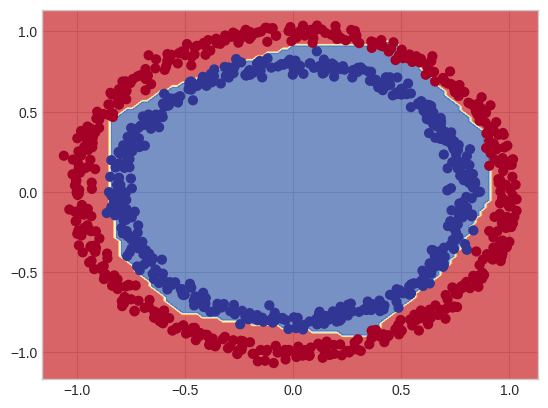

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

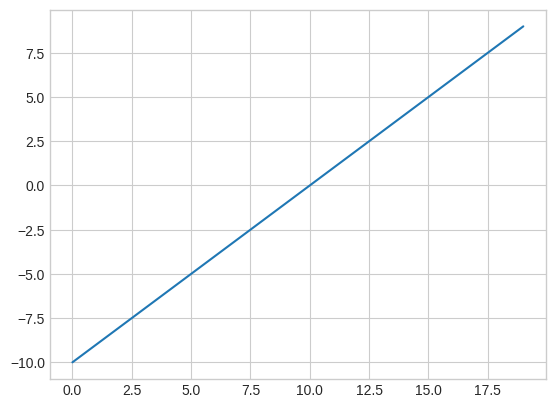

In [ ]:
# Visualize our toy tensor
plt.plot(A);

A straight (linear) line!

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [ ]:

# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

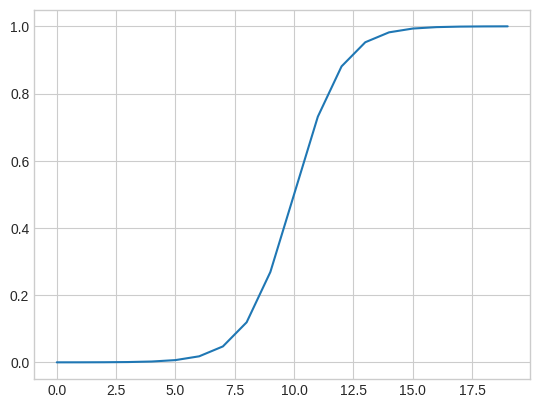

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

## Evaluating and improving our classification
So far we've been training and testing on the same data dataset...
However, in machine learning this is basically a sin.

So le'ts create a training and test set

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4325
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4725
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4975
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5175
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5150
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5263
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5263
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5462
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.5738
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9950
Model loss on the test set: 0.1657855361700058
Model accuracy on the test set: 99.50%


Now, when we started to create model_8 we said it was going to be the same as model_7 but you might've found that to be a little lie.

That's because we changed a few things:
+ The activation parameter - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.
+ The learning_rate (also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).
  + You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.

+ The number of epochs - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  + One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.



313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


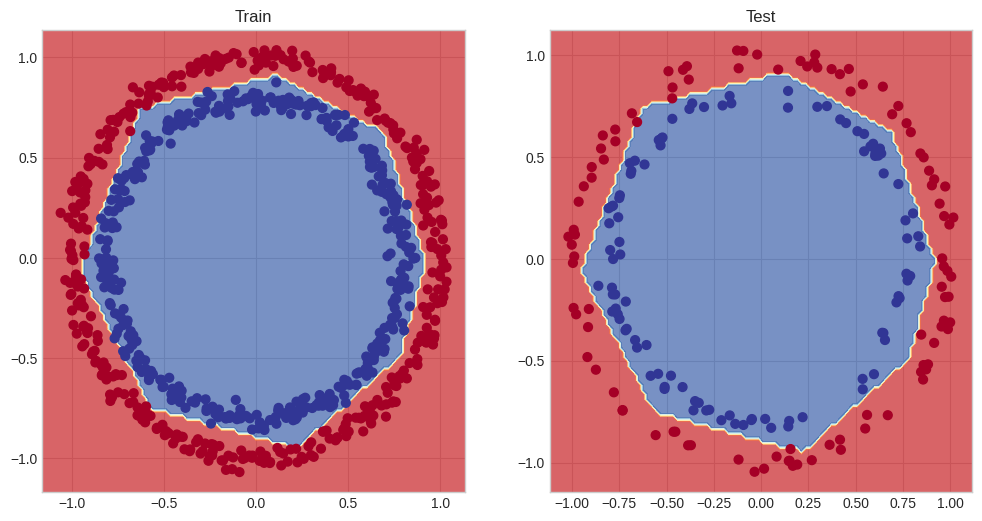

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Check that out! How cool. With a few tweaks, our model is now predicting the blue and red circles almost perfectly.

Plot the loss curves
Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.694475,0.43250
1,0.692239,0.47250
2,0.691084,0.49750
3,0.689726,0.51750
4,0.688615,0.53250
5,0.687361,0.51500
6,0.683398,0.52625
7,0.681511,0.52625
8,0.677285,0.54625
9,0.663047,0.57375


Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How's it look (visualize, visualize, visualize)?

Text(0.5, 1.0, 'Model_8 training curves')

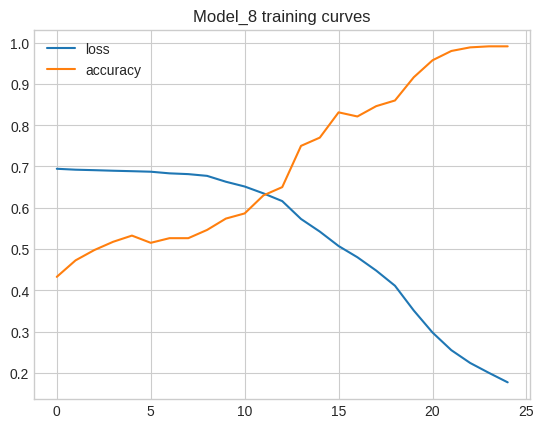

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the modt dutring training) we're going to use the following steps:
* A Learnig rate **callback** - you can think of a callback as an extra opiese of functionality you can add to your model *while* it's training.
  * Or as said in the Keras docs : A callback is an object that can perform actions at various stages of training
* Another model (we could use the same one as above, but we're practiving building models here)
* A modified loss curves plot.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
              optimizer="Adam", # same as
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

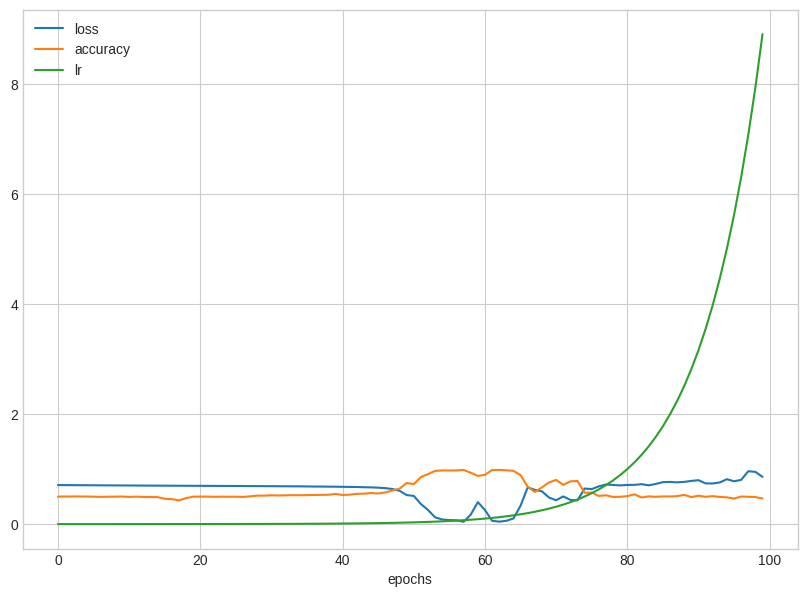

In [ ]:
# Check out the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

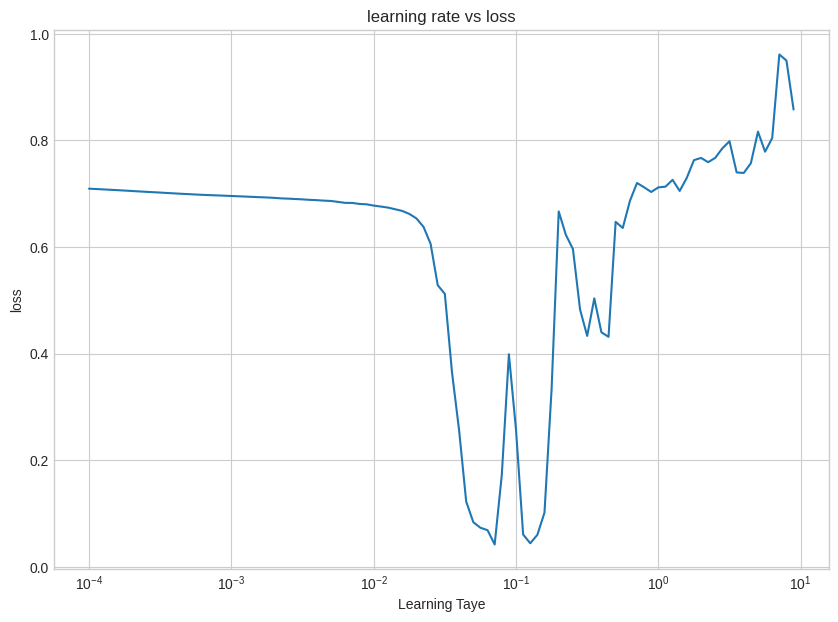

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
lrs, len(lrs)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Taye")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [ ]:
# Example of other typical learning rates values:
10 **0 , 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
0.003, 0.0025

(0.003, 0.0025)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model aas befire

# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu" ),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compile the model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate= 0.02),
                 metrics = ["accuracy"])

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs = 20, validation_data =(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 3s 42ms/step - loss: 0.6949 - accuracy: 0.4800 - val_loss: 0.6918 - val_accuracy: 0.6150
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6914 - accuracy: 0.5175 - val_loss: 0.6857 - val_accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6841 - accuracy: 0.5550 - val_loss: 0.6709 - val_accuracy: 0.6950
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6564 - accuracy: 0.6587 - val_loss: 0.6626 - val_accuracy: 0.5850
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6045 - accuracy: 0.7575 - val_loss: 0.5551 - val_accuracy: 0.8300
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.4952 - accuracy: 0.8875 - val_loss: 0.4562 - val_accuracy: 0.8300
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3765 - accuracy: 0.9513 - val_loss: 0.3202 - val_accuracy: 0.9250
Epoch 8/20
25/

In [ ]:
# Evaluate tmodel 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9850


[0.03894398361444473, 0.9850000143051147]

In [ ]:
# evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9950


[0.1657855361700058, 0.9950000047683716]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


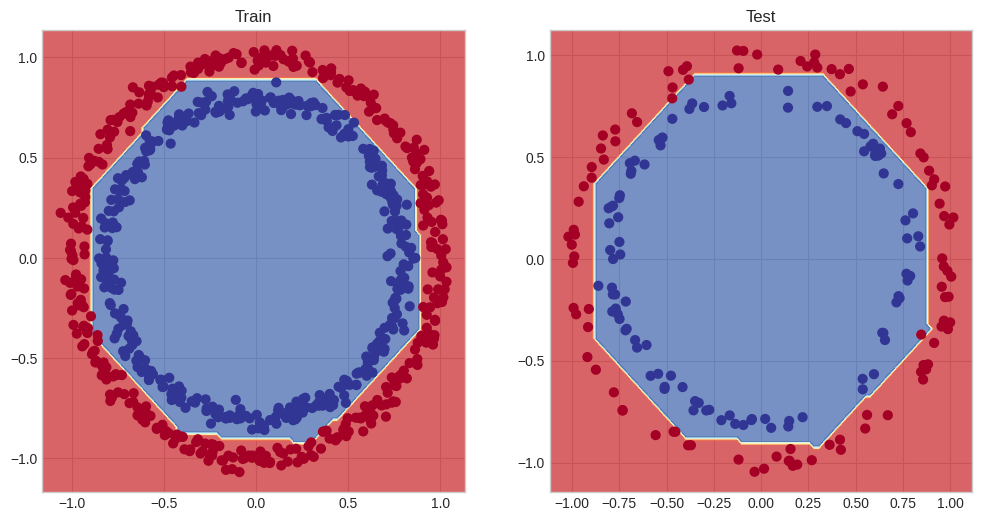

In [ ]:
w# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)